In [0]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

'tf'

fix random seed for reproducibility

In [0]:
seed = 7
numpy.random.seed(seed)

load data

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

normalize inputs from 0-255 to 0.0-1.0

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
yp=y_test

one hot encode outputs

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Create the model

In [0]:
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

Compile model

In [0]:
epochs = 70
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

Fit the model

In [0]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 53s 1ms/step - loss: 1.7807 - accuracy: 0.3560 - val_loss: 1.4483 - val_accuracy: 0.4797
Epoch 2/70
50000/50000 [==============================] - 46s 912us/step - loss: 1.4278 - accuracy: 0.4853 - val_loss: 1.2730 - val_accuracy: 0.5473
Epoch 3/70
50000/50000 [==============================] - 46s 915us/step - loss: 1.2730 - accuracy: 0.5436 - val_loss: 1.1308 - val_accuracy: 0.6010
Epoch 4/70
50000/50000 [==============================] - 46s 916us/step - loss: 1.1734 - accuracy: 0.5822 - val_loss: 1.0674 - val_accuracy: 0.6293
Epoch 5/70
50000/50000 [==============================] - 46s 916us/step - loss: 1.1109 - accuracy: 0.6049 - val_loss: 0.9959 - val_accuracy: 0.6499
Epoch 6/70
50000/50000 [==============================] - 46s 915us/step - loss: 1.0333 - accuracy: 0.6365 - val_loss: 0.9450 - val_accuracy: 0.6677
Epoch 7/70
50000/50000 [==============================] - 

Final evaluation of the model

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 74.06%


1. Performance Change

In [0]:
m1 = Sequential()
m1.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
m1.add(Dropout(0.2))
m1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Flatten())
m1.add(Dropout(0.2))
m1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(num_classes, activation='softmax'))

In [0]:
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
m1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
print(m1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [0]:
m1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 13s 264us/step - loss: 1.7022 - accuracy: 0.3685 - val_loss: 1.3729 - val_accuracy: 0.4999
Epoch 2/20
50000/50000 [==============================] - 12s 245us/step - loss: 1.2244 - accuracy: 0.5572 - val_loss: 1.1560 - val_accuracy: 0.5844
Epoch 3/20
50000/50000 [==============================] - 12s 246us/step - loss: 1.0155 - accuracy: 0.6388 - val_loss: 0.9483 - val_accuracy: 0.6656
Epoch 4/20
50000/50000 [==============================] - 12s 246us/step - loss: 0.8694 - accuracy: 0.6926 - val_loss: 0.8127 - val_accuracy: 0.7196
Epoch 5/20
50000/50000 [==============================] - 12s 245us/step - loss: 0.7732 - accuracy: 0.7278 - val_loss: 0.7648 - val_accuracy: 0.7313
Epoch 6/20
50000/50000 [==============================] - 12s 244us/step - loss: 0.6897 - accuracy: 0.7594 - val_loss: 0.7050 - val_accuracy: 0.7569
Epoch 7/20
50000/50000 [==============================] 

In [0]:
scores = m1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.47%


2. Model to Keras API Model

In [0]:
print(X_train.shape[1:])

(32, 32, 3)


In [0]:
from keras.models import Model
from keras.layers import Input

visible = Input(shape=(32,32,3))
x=Conv2D(32,(3,3),padding="same",activation='relu')(visible)
x=Dropout(0.2)(x)
x=Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(512, activation='relu', kernel_constraint=maxnorm(3))(x)
x=Dropout(0.3)(x)
x=Dense(num_classes, activation='softmax')(x)
m2 = Model(inputs=visible,output=x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
epochs = 20
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
m2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
m2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 34s 686us/step - loss: 1.7435 - accuracy: 0.3788 - val_loss: 1.3619 - val_accuracy: 0.5153
Epoch 2/20
50000/50000 [==============================] - 34s 674us/step - loss: 1.3172 - accuracy: 0.5292 - val_loss: 1.1682 - val_accuracy: 0.5890
Epoch 3/20
50000/50000 [==============================] - 34s 674us/step - loss: 1.1649 - accuracy: 0.5854 - val_loss: 1.0613 - val_accuracy: 0.6290
Epoch 4/20
50000/50000 [==============================] - 34s 675us/step - loss: 1.0505 - accuracy: 0.6284 - val_loss: 0.9807 - val_accuracy: 0.6561
Epoch 5/20
50000/50000 [==============================] - 34s 673us/step - loss: 0.9665 - accuracy: 0.6616 - val_loss: 0.9367 - val_accuracy: 0.6761
Epoch 6/20
50000/50000 [==============================] - 34s 674us/step - loss: 0.9133 - accuracy: 0.6771 - val_loss: 0.9026 - val_accuracy: 0.6842
Epoch 7/20
50000/50000 [==============================] 

3. Predicting the first four images of dataset

In [0]:
y=model.predict_classes(X_train[[1],:])
print(y[0])

9


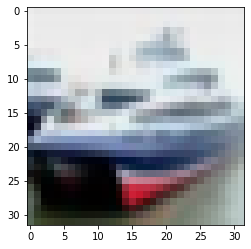

actual [8] predicted 8


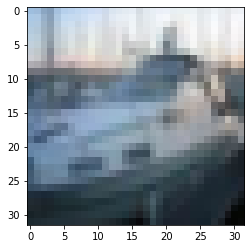

actual [8] predicted 8


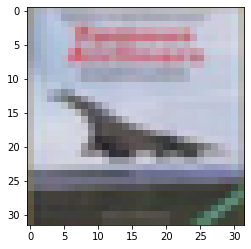

actual [0] predicted 0


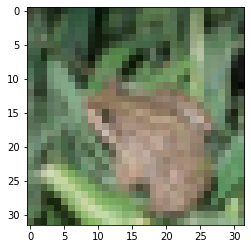

actual [6] predicted 6


In [0]:
import matplotlib.pyplot as plt
for i in range(1,5):
  plt.imshow(X_test[i,:,:])  
  plt.show()
  y=model.predict_classes(X_test[[i],:])
  print("actual",yp[i],"predicted",y[0])